In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import RZGate
from qiskit.quantum_info import Operator
import numpy as np
import json
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli
import os
import matplotlib.pyplot as plt
import itertools
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import DensityMatrix, partial_trace, Operator
import numpy as np

import Create_quantum_circuit
import Manipulate_layers
import local_projection_computation
import Checking_Equivalence_with_Choi
import Checking_Weak_Equivalence

## Example: Checking equivalence with Choi Isomorphism

In [2]:
qc_1, qc_info_1 =Create_quantum_circuit.create_random_haar_circuit(20, 3)
qc_2, qc_info_2 =Create_quantum_circuit.create_random_haar_circuit(20, 3)

#check if two equal circuits are equal
print("check if two equal circuits are equal, expected: True, True")
print('result:',Checking_Equivalence_with_Choi.check_if_two_circuits_are_equal_using_Choi_isomorphism(qc_info_1, qc_info_1,tolerance=1e-15),Checking_Equivalence_with_Choi.check_if_two_circuits_are_equal_using_Choi_isomorphism(qc_info_2, qc_info_2,tolerance=1e-15))


# check if two different circuits are equal
print("\n\ncheck if two different circuits are equal, expected: False, False")
print('result:',Checking_Equivalence_with_Choi.check_if_two_circuits_are_equal_using_Choi_isomorphism(qc_info_1, qc_info_2,tolerance=1e-15),Checking_Equivalence_with_Choi.check_if_two_circuits_are_equal_using_Choi_isomorphism(qc_info_2, qc_info_1,tolerance=1e-15))


check if two equal circuits are equal, expected: True, True
result: True True


check if two different circuits are equal, expected: False, False
result: False False


## We produce a sample result before reproduce FIG 5b. Remark that FIG 5b takes quite long time (also depends on the computing power)

In [3]:
# Run the benchmarking function
min_qubits=12 # Minimum number of qubits for the benchmark
max_qubits=40 # Maximum number of qubits for the benchmark
depth=3 # Depth of the circuit
n_patterns=1 # Number of patterns to test

Checking_Equivalence_with_Choi.benchmark_equivalence_vs_inequivalence(file_equivalence="Evaluation_Artifact_Running_time_checking_equivalence_with_Choi_Isomorphism.txt",
                                                                        file_inequivalence="Evaluation_Artifact_Running_time_checking_inequivalence_with_Choi_Isomorphism.txt",
                                                                        min_qubits=min_qubits, max_qubits=max_qubits, depth=depth, n_patterns=n_patterns)

12 qubits: Equivalence = 0.730836s ± 0.000000s, Inequivalence = 0.496531s ± 0.000000s
16 qubits: Equivalence = 1.490783s ± 0.000000s, Inequivalence = 1.064915s ± 0.000000s
20 qubits: Equivalence = 2.251297s ± 0.000000s, Inequivalence = 1.530122s ± 0.000000s
24 qubits: Equivalence = 2.740708s ± 0.000000s, Inequivalence = 1.858035s ± 0.000000s
28 qubits: Equivalence = 3.471554s ± 0.000000s, Inequivalence = 2.131642s ± 0.000000s
32 qubits: Equivalence = 3.794583s ± 0.000000s, Inequivalence = 2.660838s ± 0.000000s
36 qubits: Equivalence = 5.018914s ± 0.000000s, Inequivalence = 3.505091s ± 0.000000s
40 qubits: Equivalence = 6.317429s ± 0.000000s, Inequivalence = 4.159852s ± 0.000000s


n_qubits_eq [12, 16, 20, 24, 28, 32, 36, 40]
n_qubits_ineq [12, 16, 20, 24, 28, 32, 36, 40]


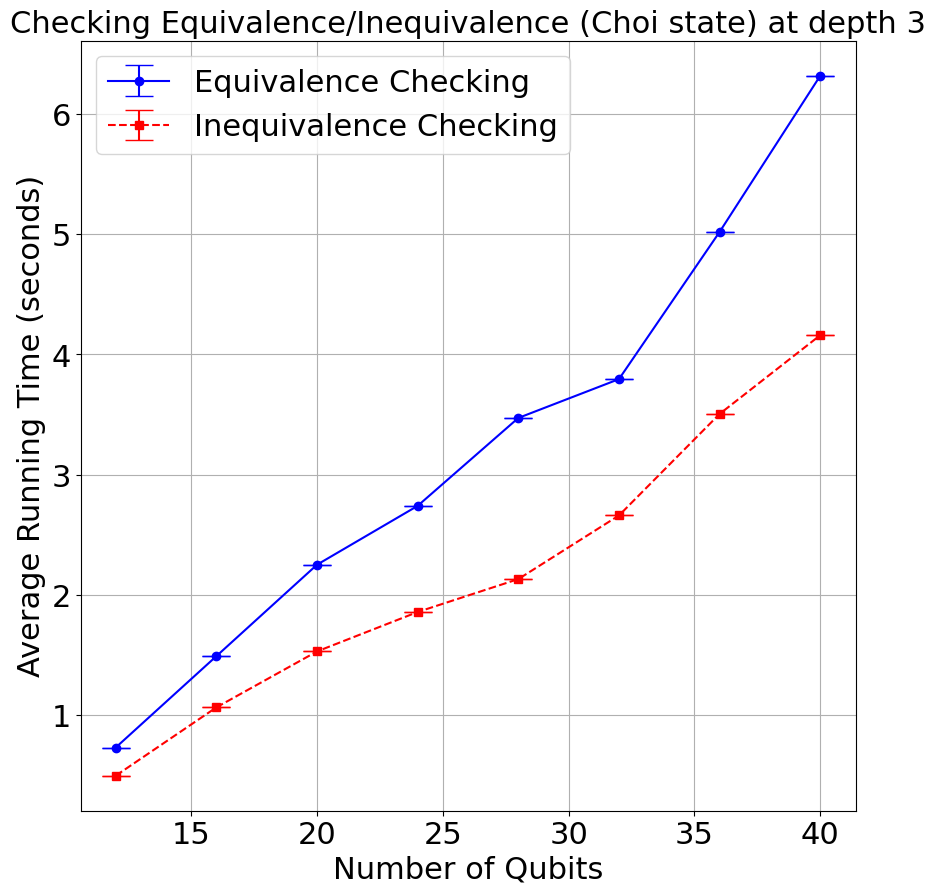

In [4]:

# Plot the results from the files generated by the benchmark function
Checking_Equivalence_with_Choi.plot_benchmark_results(file_equivalence="Evaluation_Artifact_Running_time_checking_equivalence_with_Choi_Isomorphism.txt",
                                                       file_inequivalence="Evaluation_Artifact_Running_time_checking_inequivalence_with_Choi_Isomorphism.txt",
                                                       output_file_name="Evaluation_Artifact_Running_time_checking_equivalence_with_Choi_Isomorphism.pdf",
                                                       depth=depth)

## Now, we reproduce FIG 5b in the following block - one can adjust number of patterns if time permits

20 qubits: Equivalence = 2.320782s ± 0.000000s, Inequivalence = 1.695101s ± 0.000000s
24 qubits: Equivalence = 3.693462s ± 0.000000s, Inequivalence = 2.614738s ± 0.000000s
28 qubits: Equivalence = 5.488958s ± 0.000000s, Inequivalence = 4.551656s ± 0.000000s
32 qubits: Equivalence = 7.972329s ± 0.000000s, Inequivalence = 5.446172s ± 0.000000s
36 qubits: Equivalence = 9.718105s ± 0.000000s, Inequivalence = 6.537858s ± 0.000000s
40 qubits: Equivalence = 11.773241s ± 0.000000s, Inequivalence = 7.254501s ± 0.000000s
44 qubits: Equivalence = 12.733723s ± 0.000000s, Inequivalence = 9.201708s ± 0.000000s
48 qubits: Equivalence = 14.902252s ± 0.000000s, Inequivalence = 9.905896s ± 0.000000s
52 qubits: Equivalence = 16.377246s ± 0.000000s, Inequivalence = 11.510190s ± 0.000000s
56 qubits: Equivalence = 16.967863s ± 0.000000s, Inequivalence = 11.609204s ± 0.000000s
60 qubits: Equivalence = 18.400630s ± 0.000000s, Inequivalence = 13.487509s ± 0.000000s
64 qubits: Equivalence = 18.877369s ± 0.00000

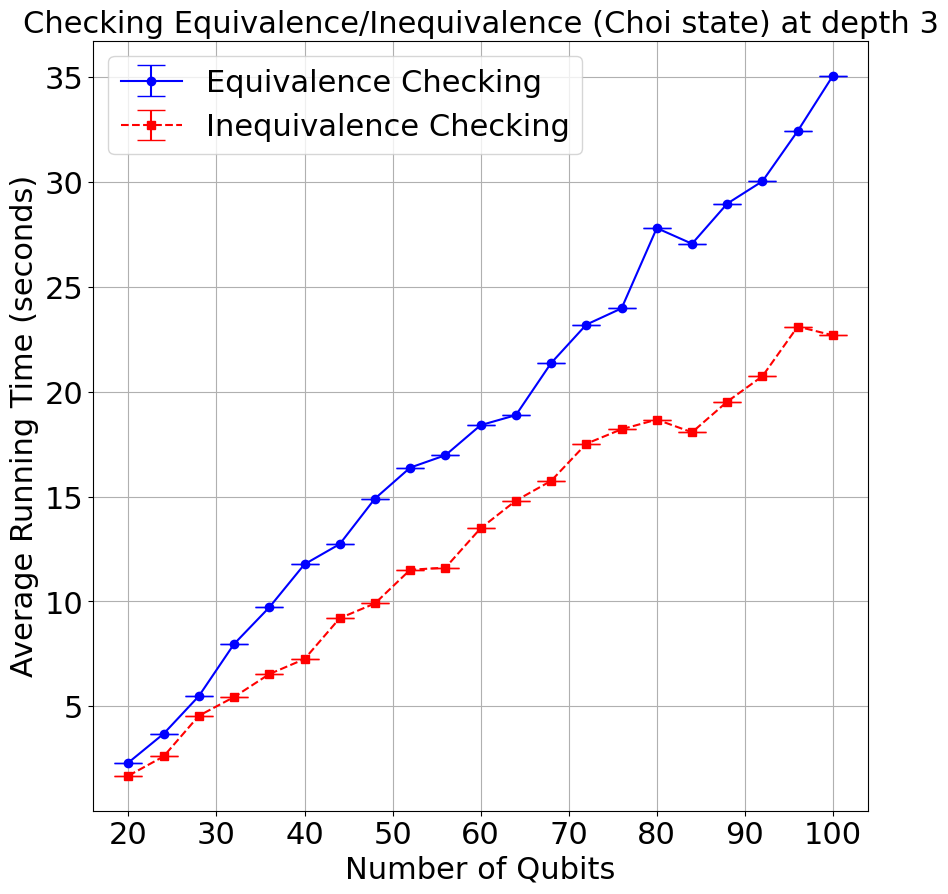

In [5]:
# Run the benchmarking function
min_qubits=20 # Minimum number of qubits for the benchmark
max_qubits=100 # Maximum number of qubits for the benchmark
depth=3 # Depth of the circuit
n_patterns=1 # Number of patterns to test

Checking_Equivalence_with_Choi.benchmark_equivalence_vs_inequivalence(file_equivalence="Evaluation_Artifact_Running_time_checking_equivalence_with_Choi_Isomorphism_reproduce_FIG_5b.txt",
                                                                        file_inequivalence="Evaluation_Artifact_Running_time_checking_inequivalence_with_Choi_Isomorphism_reproduce_FIG_5b.txt",
                                                                        min_qubits=min_qubits, max_qubits=max_qubits, depth=depth, n_patterns=n_patterns)
Checking_Equivalence_with_Choi.plot_benchmark_results(file_equivalence="Evaluation_Artifact_Running_time_checking_equivalence_with_Choi_Isomorphism_reproduce_FIG_5b.txt",
                                                       file_inequivalence="Evaluation_Artifact_Running_time_checking_inequivalence_with_Choi_Isomorphism_reproduce_FIG_5b.txt",
                                                       output_file_name="Evaluation_Artifact_reproduce_FIG_5b.pdf",
                                                       depth=depth)

## Below is the submitted FIG 5b

n_qubits_eq [20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100]
n_qubits_ineq [20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100]


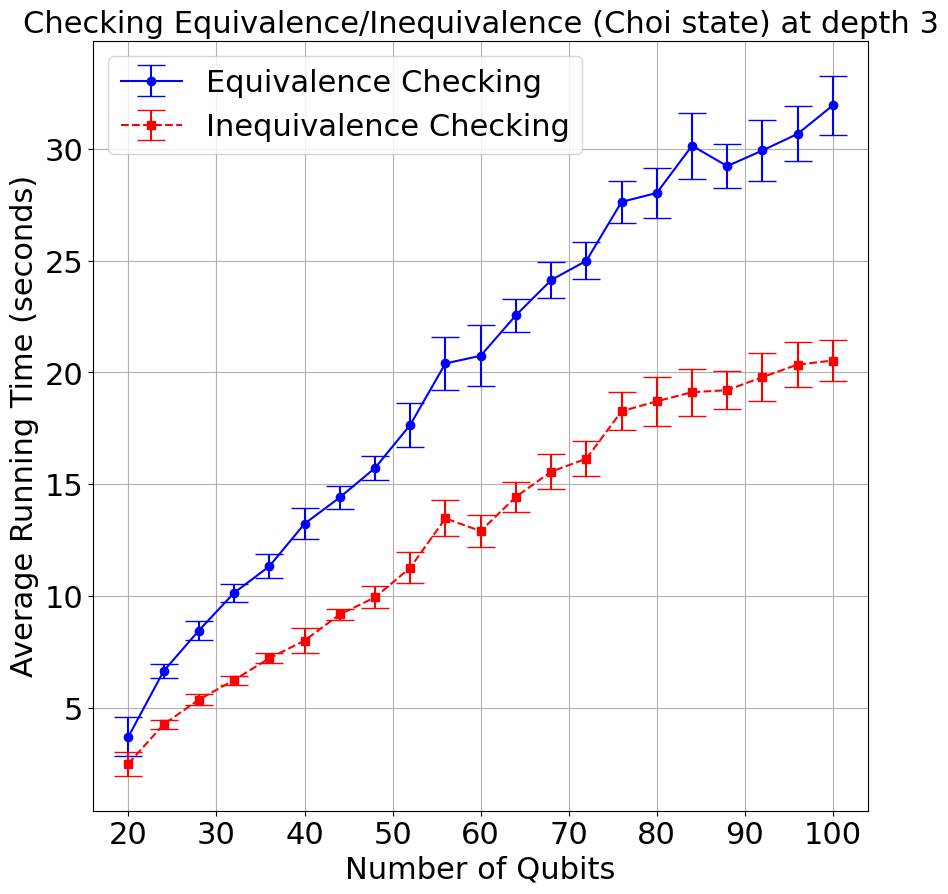

In [6]:
Checking_Equivalence_with_Choi.plot_benchmark_results(file_equivalence="SUBMITTED_running_time_checking_equivalence_with_Choi_depth_3.txt",
                                                        file_inequivalence="SUBMITTED_running_time_checking_inequivalence_with_Choi_depth_3.txt",
                                                        output_file_name="SUBMITTED_FIG_5b.pdf",
                                                        depth=depth)